<a href="https://colab.research.google.com/github/Ramanathan63/Yelp-Restaurant-Review-/blob/main/Ram_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Import** **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **2..Upload Dataset**

In [ ]:
df = pd.read_csv('/content/Yelp Restaurant Reviews.csv.zip')

In [ ]:
df.head()

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...


In [ ]:
df.shape

(19896, 4)

In [ ]:
df.dtypes

,0
Yelp URL,object
Rating,int64
Date,object
Review Text,object


In [ ]:
df.isnull().sum()

,0
Yelp URL,0
Rating,0
Date,0
Review Text,0


In [ ]:
df.describe()

,Rating
count,19896.000000
mean,4.130830
std,1.200746
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df.dropna(subset=['Review Text'], inplace=True)

In [ ]:
df.isna().sum()

,0
Yelp URL,0
Rating,0
Date,0
Review Text,0


# **3.Data Preprocessing**

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Accuracy: 0.8987
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       917
           1       0.91      0.97      0.94      3063

    accuracy                           0.90      3980
   macro avg       0.88      0.82      0.85      3980
weighted avg       0.90      0.90      0.89      3980



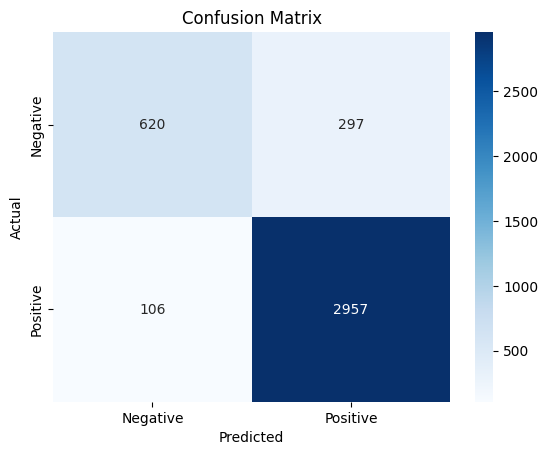

Review 1 sentiment: Positive
Review 2 sentiment: Negative


In [ ]:
# Import libraries
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

nltk.download('punkt_tab')
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Yelp Restaurant Reviews.csv.zip')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Clean text function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenize text into words
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]  # Lemmatize and remove stopwords
    return " ".join(words)

# Apply cleaning function to the review text column
df['cleaned_review'] = df['Review Text'].apply(clean_text)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract additional date features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.dayofweek

# Encoding sentiment based on the rating score (assuming ratings are between 1-5)
df['Sentiment'] = df['Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')

# Prepare data for modeling
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)  # Encode labels as 1 (positive) and 0 (negative)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Function to predict sentiment for new reviews
def predict_sentiment(text):
    # Preprocess the input review
    cleaned_text = clean_text(text)
    text_vectorized = vectorizer.transform([cleaned_text]).toarray()
    prediction = model.predict(text_vectorized)[0]
    return 'Positive' if prediction == 1 else 'Negative'

# Test the function with new reviews
review_1 = "The food was fantastic, I loved it!"
review_2 = "Horrible service, would not come again."

print(f"Review 1 sentiment: {predict_sentiment(review_1)}")
print(f"Review 2 sentiment: {predict_sentiment(review_2)}")


In [ ]:
df = df.drop(columns=['Yelp URL'])

In [ ]:
df.shape

(19896, 8)

In [ ]:
df.head()

,Rating,Date,Review Text,cleaned_review,year,month,day_of_week,Sentiment
0,5,2022-01-22,All I can say is they have very good ice cream...,say good ice cream would sure recommend cooky ...,2022,1,5,Positive
1,4,2022-06-26,Nice little local place for ice cream.My favor...,nice little local place ice creammy favorite p...,2022,6,6,Positive
2,5,2021-08-07,A delicious treat on a hot day! Staff was very...,delicious treat hot day staff friendly helpful...,2021,8,5,Positive
3,4,2016-07-28,This was great service and a fun crew! I got t...,great service fun crew got banana cream pie ch...,2016,7,3,Positive
4,5,2015-06-23,This is one of my favorite places to get ice c...,one favorite place get ice cream cu area bit d...,2015,6,1,Positive


In [ ]:
df.isna().sum()

,0
Rating,0
Date,0
Review Text,0
cleaned_review,0
year,0
month,0
day_of_week,0
Sentiment,0


# **4.Data Visualization**

* Distribution of Rating




<ipython-input-15-5775e3685cc6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='Blues')


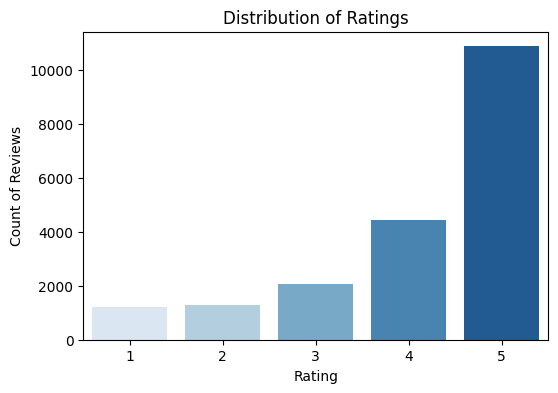

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x='Rating', data=df, palette='Blues')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count of Reviews')
plt.show()


**Review Count by Month**

<ipython-input-17-27eb350ce74f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df, order=range(1, 13), palette='coolwarm')


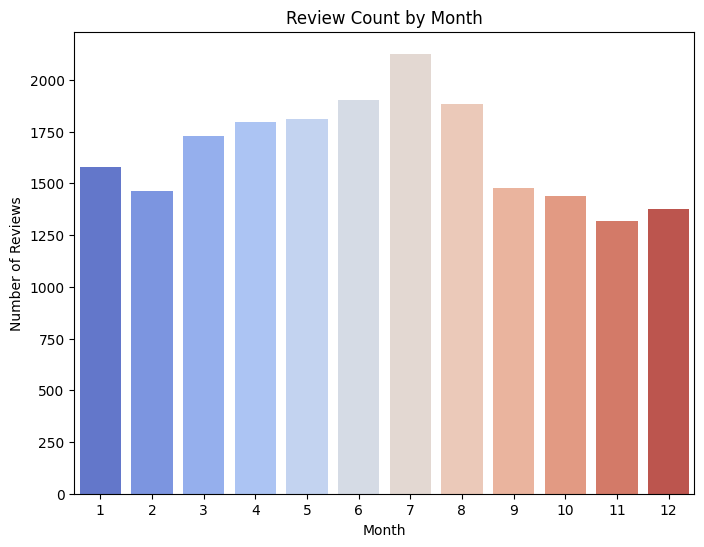

In [ ]:
# Review Count by Month (Bar chart)
plt.figure(figsize=(8, 6))
sns.countplot(x='month', data=df, order=range(1, 13), palette='coolwarm')
plt.title('Review Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()


* **Review** **Count** **by** **Year**

<ipython-input-18-ad0543f1588d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='coolwarm')


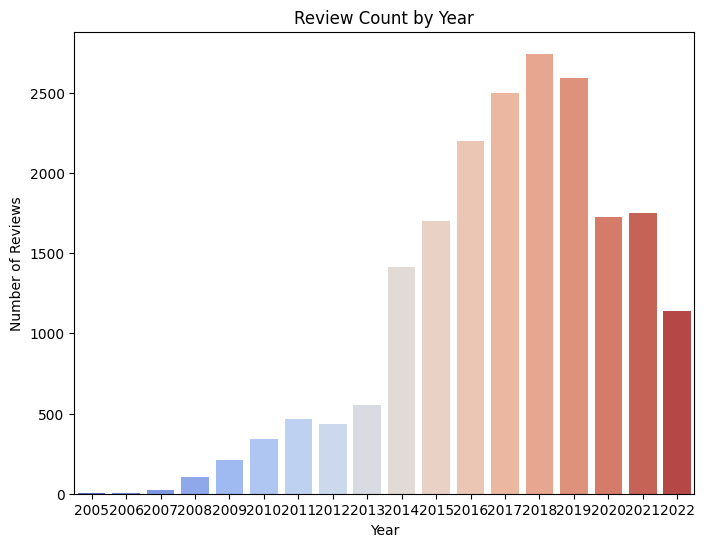

In [ ]:
# Review Count by Year (Bar chart)
plt.figure(figsize=(8, 6))
sns.countplot(x='year', data=df, palette='coolwarm')
plt.title('Review Count by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()



* **Average** **Rating** **by** **Month**

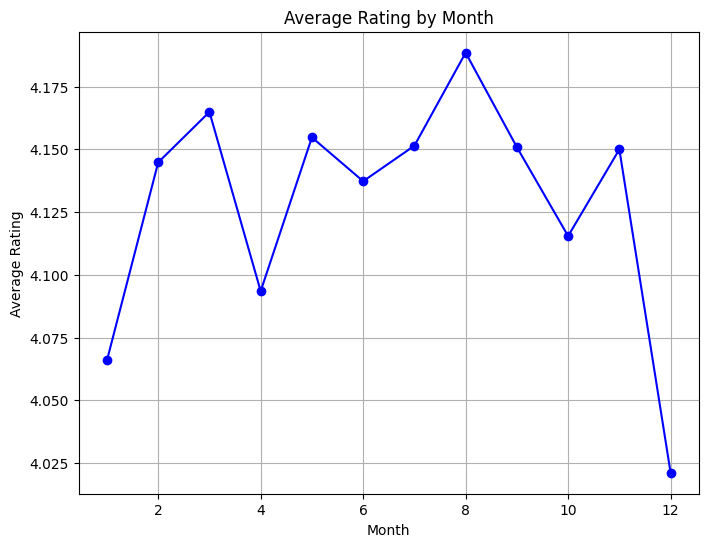

In [ ]:
# Average Rating by Month (Line chart)
avg_rating_by_month = df.groupby('month')['Rating'].mean()
plt.figure(figsize=(8, 6))
avg_rating_by_month.plot(kind='line', marker='o', color='b')
plt.title('Average Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

* **Average** **Rating** **by** **Day** **of** **the** **Week**

<ipython-input-20-9619fee75b22>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_day.index, y=avg_rating_by_day.values, palette='viridis')


<Figure size 800x600 with 0 Axes>

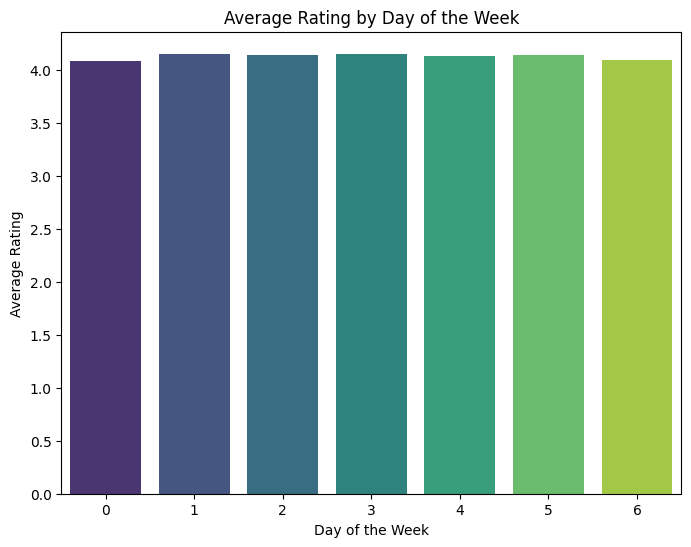

In [ ]:
# Average Rating by Day of the Week (Bar chart)
avg_rating_by_day = df.groupby('day_of_week')['Rating'].mean()
plt.figure(figsize=(8, 6))
# Average Rating by Day of the Week (Bar chart)
avg_rating_by_day = df.groupby('day_of_week')['Rating'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_rating_by_day.index, y=avg_rating_by_day.values, palette='viridis')
plt.title('Average Rating by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rating')
plt.show()

* **Correlation** **Heatmap**

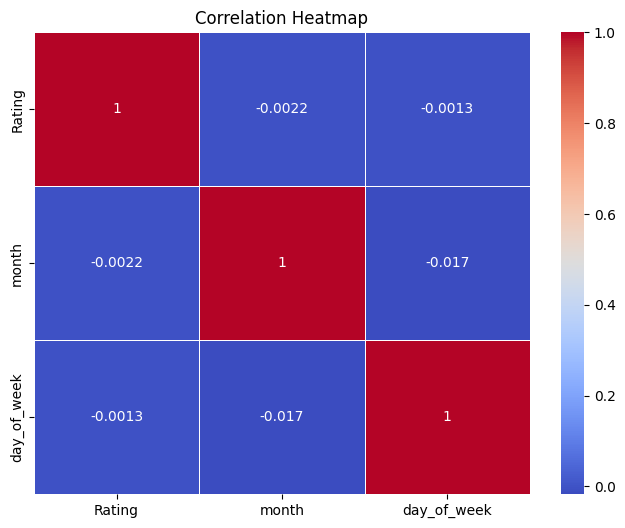

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe has numerical columns like 'Rating', 'sentiment_score'
# For example, let's consider you have these columns: 'Rating', 'sentiment_score', 'month', etc.

# Generate a correlation matrix
corr_matrix = df[['Rating', 'month', 'day_of_week']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

* **Average** **Ratings by Month and Day of the Week ***

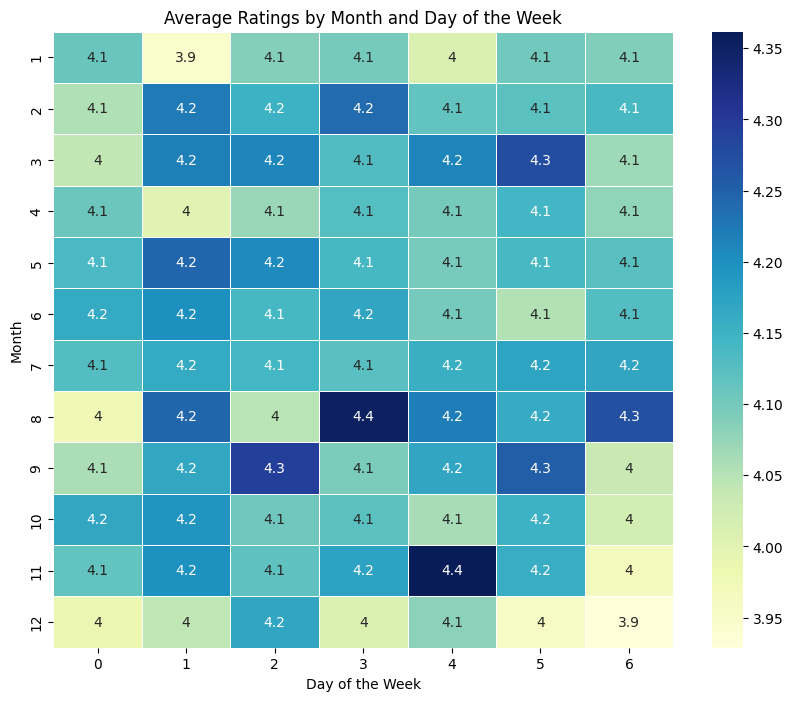

In [ ]:
rating_heatmap_data = df.pivot_table(index='month', columns='day_of_week', values='Rating', aggfunc='mean')

# Create a heatmap to visualize the average ratings
plt.figure(figsize=(10, 8))
sns.heatmap(rating_heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Average Ratings by Month and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.show()

* **Review Counts by Month and Day of the Week**

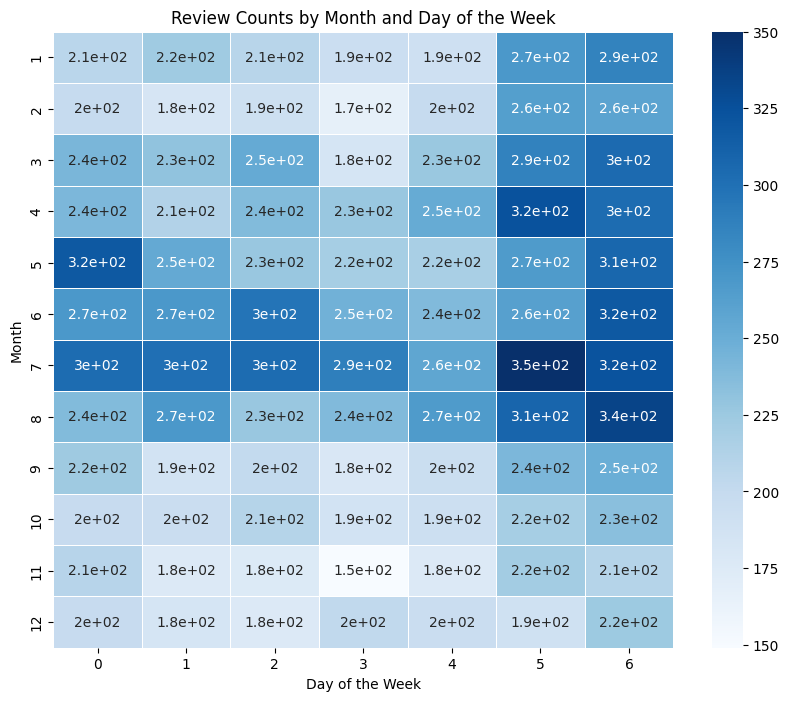

In [ ]:
review_count_heatmap_data = df.pivot_table(index='month', columns='day_of_week', values='Rating', aggfunc='count')

# Create a heatmap to visualize the number of reviews
plt.figure(figsize=(10, 8))
sns.heatmap(review_count_heatmap_data, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Review Counts by Month and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.show()

# **5.Sentiment Analysis**

* **Distribution of Review Lengths**

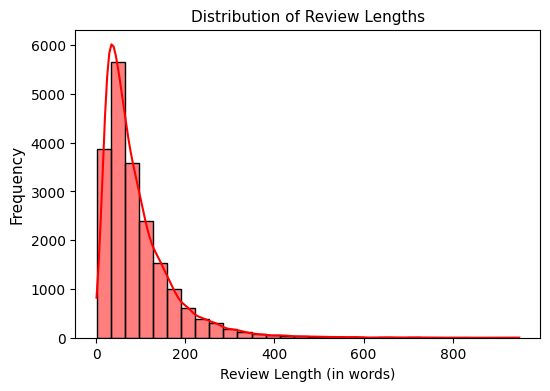

In [ ]:
# Calculate the length of each review (in words)
df['review_length'] = df['Review Text'].apply(lambda x: len(x.split()))  # Review length in words

# Plot the distribution of review lengths
plt.figure(figsize=(6, 4))
sns.histplot(df['review_length'], bins=30, kde=True, color='red', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Review Lengths', fontsize=11)
plt.xlabel('Review Length (in words)', fontsize=10)
plt.ylabel('Frequency', fontsize=11)

plt.show()

* **Word Cloud**

  Positive review and
  Negative Review



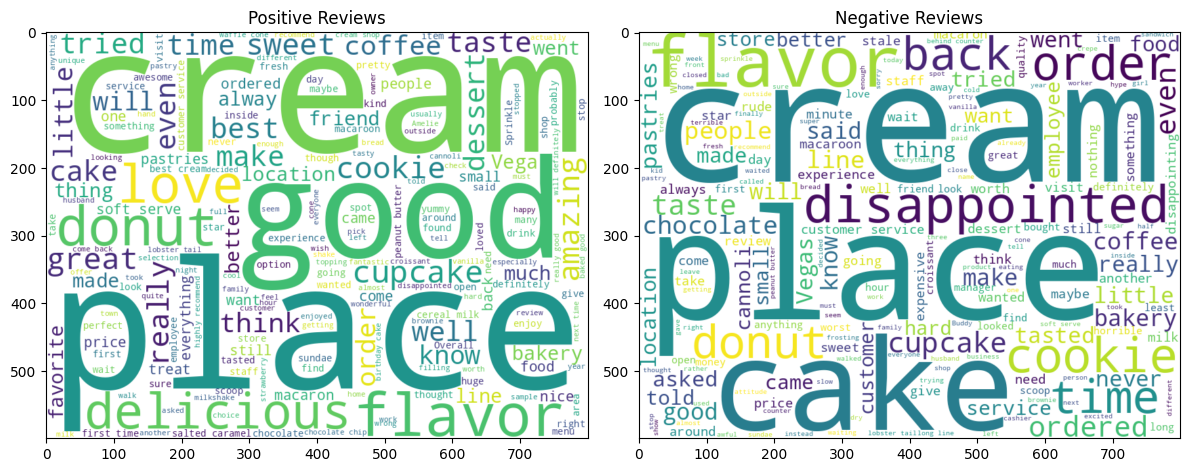

In [ ]:
import zipfile
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

# Step 1: Unzip the file and load the CSV file
zip_file_path = '/content/Yelp Restaurant Reviews.csv.zip'  # Adjust the file path
unzip_dir = 'extracted_files'  # Directory to extract the files

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# Load the dataset
csv_file = os.path.join(unzip_dir, 'Yelp Restaurant Reviews.csv')  # Adjust file name if needed
df = pd.read_csv(csv_file)

def clean_text(text):
    return " ".join(word for word in text.split() if len(word) > 3)
df['cleaned_text'] = df['Review Text'].dropna().apply(clean_text)
def get_sentiment(text):
    return 'positive' if TextBlob(text).sentiment.polarity > 0 else 'negative'

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['cleaned_text'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['cleaned_text'])

positive_wordcloud = WordCloud(width=800, height=600, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=600, background_color='white').generate(negative_reviews)

plt.figure(figsize=(12, 6))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('on')
plt.title('Positive Reviews')
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('on')
plt.title('Negative Reviews')

plt.tight_layout()
plt.show()

* **Top 10 Key Words Use Yelp Reviews**

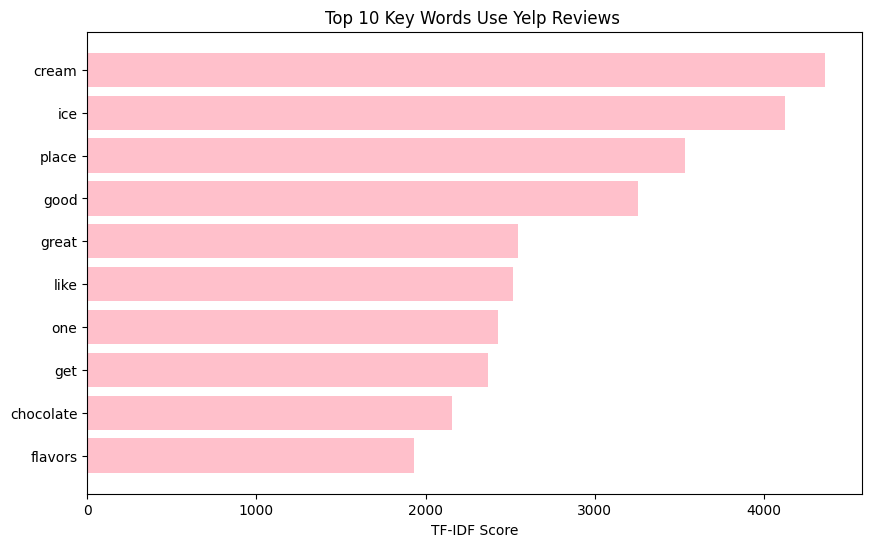

In [ ]:
reviews = df['Review Text'].dropna().values  # Make sure review_text column exists

# Step 2: Preprocess the text (convert to lowercase and remove stopwords)
stop_words = set(stopwords.words('english'))
preprocessed_reviews = [' '.join([word for word in review.lower().split() if word not in stop_words])
                        for review in reviews]

# Step 3: Apply TF-IDF to extract keywords
vectorizer = TfidfVectorizer(max_features=10)  # Get top 10 keywords
X = vectorizer.fit_transform(preprocessed_reviews)

# Step 4: Extract and sort keywords based on TF-IDF score
keywords = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
sorted_keywords = sorted(keywords, key=lambda x: x[1], reverse=True)

# Step 5: Prepare data for plotting
top_keywords = [kw[0] for kw in sorted_keywords]
top_scores = [kw[1] for kw in sorted_keywords]

# Step 6: Create a bar plot for the top keywords
plt.figure(figsize=(10, 6))
plt.barh(top_keywords, top_scores, color='pink')
plt.xlabel('TF-IDF Score')
plt.title('Top 10 Key Words Use Yelp Reviews ')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score on top
plt.show()

# **6.Sentiment Distribution of Yelp Reviews**

sentiment
Positive    18399
Negative     1366
Neutral       131
Name: count, dtype: int64


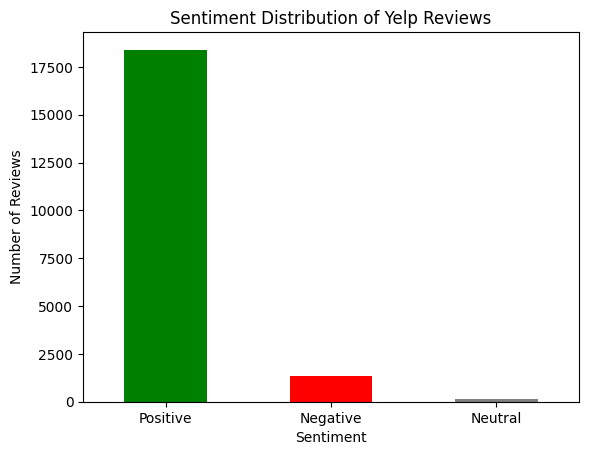

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    # Polarity is between -1 (negative) and 1 (positive)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Step 3: Apply sentiment analysis to each review
df['sentiment'] = df['Review Text'].apply(get_sentiment)

# Step 4: Count the number of reviews in each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Print the sentiment counts
print(sentiment_counts)

# Step 5: Plot the sentiment distribution
import matplotlib.pyplot as plt

# Create a bar plot for sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of Yelp Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# **7.Train and Test Data**

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
reviews = df['Review Text'].values
X_train, X_test = train_test_split(reviews, test_size=0.2, random_state=42)

# Show the size of the splits
print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")


Training data size: 15916
Testing data size: 3980


In [ ]:
# Assuming 'df' contains your dataframe with 'Review Text' and 'sentiment' columns

# Step 1: Create the target variable 'y'
y = df['sentiment']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review Text'], y, test_size=0.2, random_state=42)

# Step 3: Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Step 4: Fit and transform the vectorizer on the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Step 5: Transform the testing data using the fitted vectorizer
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust the number of features if necessary

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the train data)
X_test_tfidf = vectorizer.transform(X_test)

# **8.Train model**

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier

# Dictionary of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'LightGBM': LGBMClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier()
}

# Placeholder for the evaluation metrics
metrics = []

# Evaluate each model
for model_name, model in models.items():
    try:
        # Fit the model
        model.fit(X_train_tfidf, y_train)

        # Make predictions
        y_pred = model.predict(X_test_tfidf)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # Append metrics to the list
        metrics.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
    except Exception as e:
        print(f"Error training {model_name}: {e}")

# Convert the metrics list to a DataFrame
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.525224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183333
[LightGBM] [Info] Number of data points in the train set: 15916, number of used features: 3210
[LightGBM] [Info] Start training from score -2.658470
[LightGBM] [Info] Start training from score -4.938882
[LightGBM] [Info] Start training from score -0.080362
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.953015   0.944468  0.953015  0.943809
1        Random Forest  0.938945   0.930452  0.938945  0.916295
2                  SVM  0.943970   0.939795  0.943970  0.925491
3                  KNN  0.927638   0.908128  0.927638  0.914236
4             LightGBM  0.957789   0.952526  0.957789  0.953547
5    Gradient Boosting  0.941206   0.931761  0.941206  0.929900
6       Neural Network  0.950503 

In [ ]:
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.953015   0.944468  0.953015  0.943809
1        Random Forest  0.938945   0.930452  0.938945  0.916295
2                  SVM  0.943970   0.939795  0.943970  0.925491
3                  KNN  0.927638   0.908128  0.927638  0.914236
4             LightGBM  0.957789   0.952526  0.957789  0.953547
5    Gradient Boosting  0.941206   0.931761  0.941206  0.929900
6       Neural Network  0.950503   0.944518  0.950503  0.947198


In [ ]:
!pip install gradio==3.39.0

INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 k

In [ ]:
import gradio as gr
from sklearn.feature_extraction.text import TfidfVectorizer
# ... (import other necessary libraries from your existing code) ...

/usr/local/lib/python3.10/dist-packages/gradio_client/documentation.py:106: UserWarning: Could not get documentation group for <class 'gradio.mix.Parallel'>: No known documentation group for module 'gradio.mix'
  warnings.warn(f"Could not get documentation group for {cls}: {exc}")
/usr/local/lib/python3.10/dist-packages/gradio_client/documentation.py:106: UserWarning: Could not get documentation group for <class 'gradio.mix.Series'>: No known documentation group for module 'gradio.mix'
  warnings.warn(f"Could not get documentation group for {cls}: {exc}")


In [ ]:
def predict_sentiment(text):
    # Preprocess the input text (e.g., cleaning, tokenization)
    cleaned_text = clean_text(text)  # Assuming you have a clean_text function

    # Vectorize the text using the trained TfidfVectorizer
    input_tfidf = vectorizer.transform([cleaned_text])
    # Assuming 'vectorizer' is your trained TfidfVectorizer object from the code you provided

    # Make prediction using your trained model
    prediction = model.predict(input_tfidf)[0]
    # Assuming 'model' is your trained sentiment analysis model

    return prediction  # Return the sentiment prediction (e.g., "Positive", "Negative", "Neutral")

In [ ]:
iface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=2, placeholder="Enter your review here..."),
    outputs="text",
    title="Yelp Restaurant Review Sentiment Analysis",
    description="Enter a restaurant review to predict its sentiment.",
)

iface.launch()

IMPORTANT: You are using gradio version 3.39.0, however version 4.44.1 is available, please upgrade.
--------
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>